# Simulating Chaotic Circuit in Python

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from tools import Circuit, local_max, unique_maxs, phase_diagram, find_splitting
from datetime import datetime as dt
import pytz # for seting datetime timezone

### Test Circuit, Time Series &amp; Phase Portrait

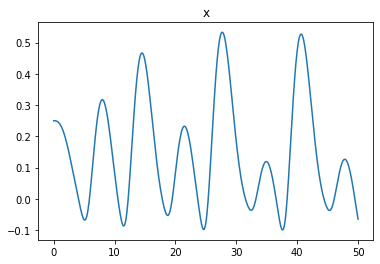

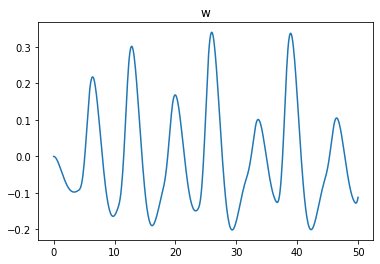

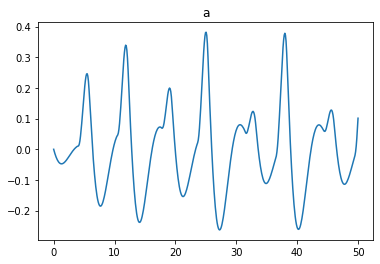

0.047


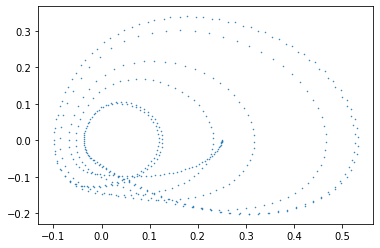

In [5]:
test = Circuit(66.5)
x = np.linspace(0,50,500)
y0 = [0.25, 0, 0]
tspan = (0, max(x))
sol = test.solve(tspan, y0, plot = True, phase = False, t_eval = x) # lol nope lmao, good catch
print(test.Tc)
phase_diagram(sol, '.', markersize = 1)
#plt.xlim((-0.5,0.8))
#plt.ylim((-0.5,0.8))

### Generate Power Spectrum

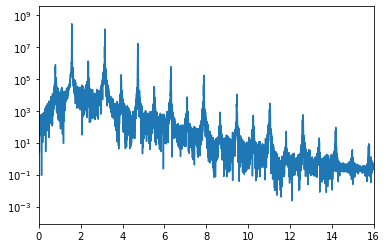

In [3]:
# Power Spectrum Code Sampled From https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

circuit = Circuit(66.5)
time_arr = np.linspace(200,5200,200000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = circuit.solve(tspan, y0,  t_eval = time_arr)
timestep = max(time_arr)/len(time_arr)


p = np.abs(np.fft.rfft(sol.y[0]))**2 #xdat is in volts and power = V^2 / R so is perportional up to a resistance
f = np.linspace(0,1/(timestep*circuit.Tc*2),len(p))
plt.plot(f, p)


plt.xlim(0,16)
plt.yscale("log")

[2.81708594e+08 1.31245588e+08 1.63496260e+07 5.87722106e+05
 1.66610656e+05 1.07810261e+04 2.98462700e+03 5.58611977e+02
 9.09397950e+01 8.52472545e+00 2.20143683e+00 2.56347032e+00
 2.34931688e+00 1.29956620e+00]
[ 385  771 1156 1541 1928 2313 2697 3084 3469 3854 4234 4620 5010 5396]


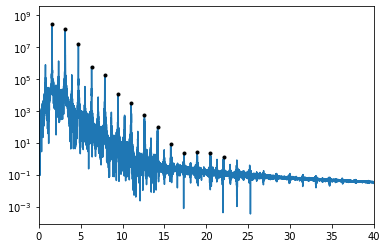

In [4]:
plt.plot(f, p)
plt.xlim(0,40)
plt.yscale("log")

maxs, indexes = local_max(p[:6000], N = 300)
print(maxs)
print(indexes)

plt.plot(f[indexes], maxs, 'k.')
lowest_f = f[indexes[0]]



### Generate Bifurcation Plot

In [ ]:
Rv_arr = np.arange(40,120,0.1) # some padding on both sides
y0 = [0.25, 0, 0]
time_arr = np.linspace(700,1500,2000)
tspan = (0, max(time_arr))
bifurcation = circuit.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9, error_tol = 3e-3)
print(len(bifurcation))

800
/work/Analysis/tools.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


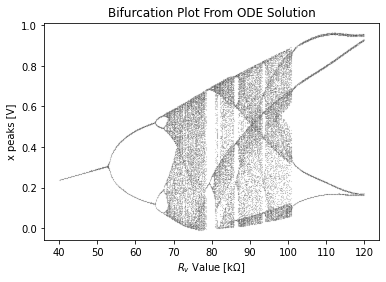

[121 249 274 295 334]
bifurcation points: [52.1 64.9 67.4 69.5 73.4]


In [ ]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.1)


plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")

tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())

#plt.xlim(60,74)
plt.savefig("/work/Notes/Simulation/"+dateString+"-700s-1500s_settling_NumericalBifurcation.pdf",dpi = 300)
plt.show()
indexes = find_splitting(bifurcation)
print(indexes)
bifurcation_points = Rv_arr[indexes]
print(f"bifurcation points: {bifurcation_points}")

In [ ]:
circuit2 = Circuit(66)
Rv_arr = np.arange(67.8, 68.2,0.001) 
y0 = [0.25, 0, 0]
time_arr = np.linspace(900,1300,2000)
tspan = (0, max(time_arr))
bifurcation = circuit2.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9)
print(len(bifurcation))

401
/work/Analysis/tools.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


Text(0.5, 0, '$R_v$ Value [k$\\Omega$]')

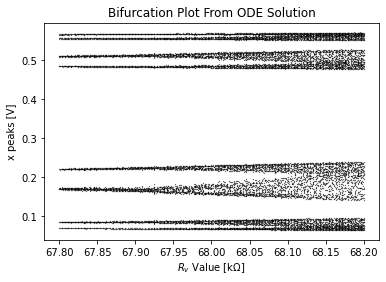

In [ ]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.5)
                                                                                                         

plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>